In [99]:
#!pip install "modin[all]
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, show
from scipy.stats import pointbiserialr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
path = "311_Service_Requests_from_2010_to_Present_min.csv"
df=pd.read_csv(path)
df.head()

2023-12-23 22:23:23,712	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-12-23 22:23:28,050	INFO worker.py:1673 -- Started a local Ray instance.


,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [3]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [4]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unnamed: 0              int64         
 1   Unique Key              int64         
 2   Created Date            datetime64[ns]
 3   Closed Date             object        
 4   Complaint Type          object        
 5   Location Type           object        
 6   Incident Zip            float64       
 7   Incident Address        object        
 8   Street Name             object        
 9   Address Type            object        
 10  City                    object        
 11  Status                  object        
 12  Resolution Description  object        
 13  Borough                 object        
 14  Latitude                float64       
 15  Longitude               float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(10)
memory usage: 734.8+ MB


In [5]:
df.shape

(6019843, 16)

In [6]:
df.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df.columns.value_counts()

Unnamed: 0                1
Unique Key                1
Created Date              1
Closed Date               1
Complaint Type            1
Location Type             1
Incident Zip              1
Incident Address          1
Street Name               1
Address Type              1
City                      1
Status                    1
Resolution Description    1
Borough                   1
Latitude                  1
Longitude                 1
Name: count, dtype: int64

In [8]:
df['Complaint Type'].value_counts()

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


Complaint Type
HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Electric                        1

Similiar "HEAT/HOT WATER", "HEATING" and  "PAINT - PLASTER" , "PAINT/PLASTER"

In [9]:
df['Complaint Type'] = np.where(df['Complaint Type'] == 'HEATING','HEAT/HOT WATER', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'PAINT/PLASTER','PAINT - PLASTER', df['Complaint Type'])

In [10]:
df['Complaint Type'].value_counts().head(1)

Complaint Type
HEAT/HOT WATER    2149424
Name: count, dtype: int64

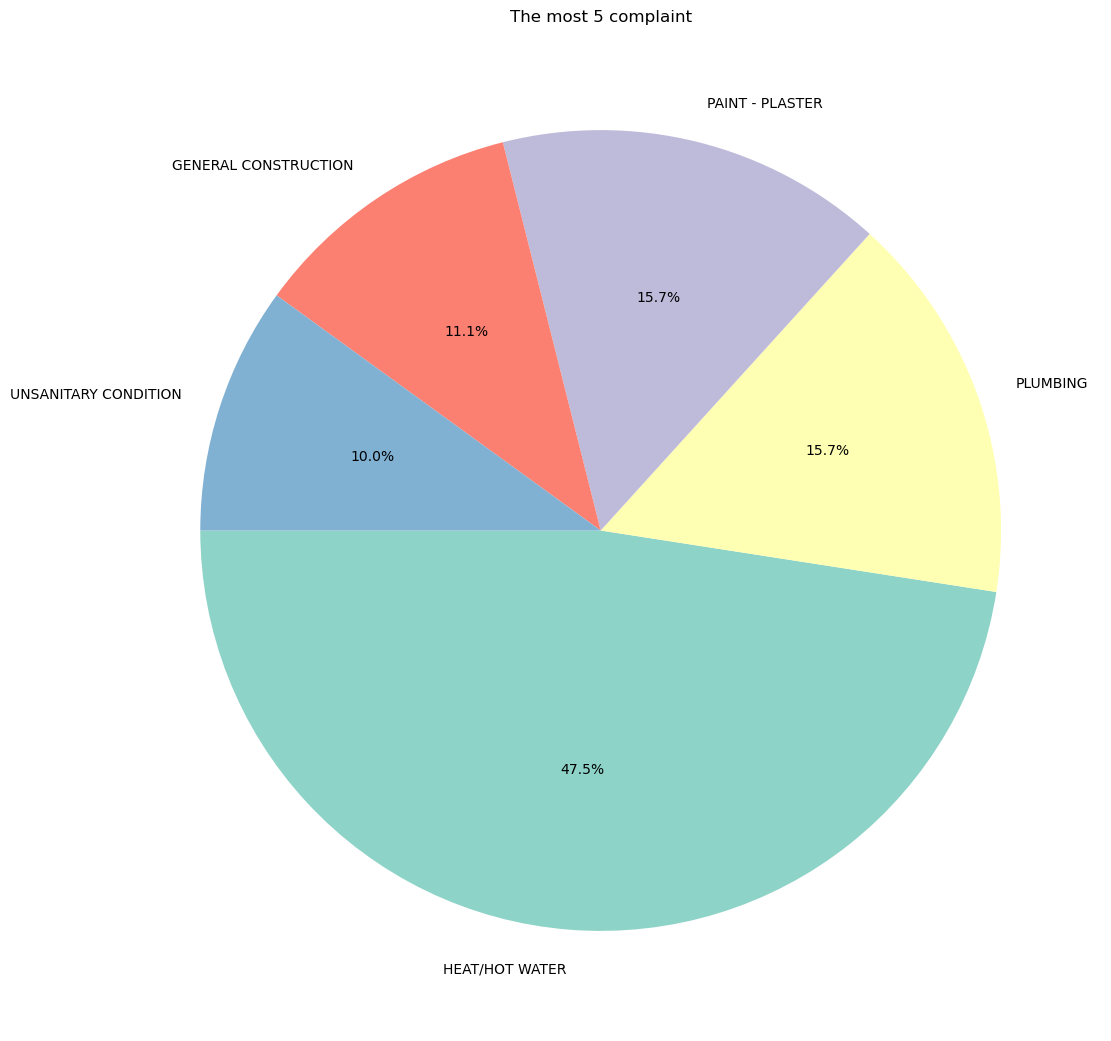

In [11]:
complaint_counts = df['Complaint Type'].value_counts().head()
plt.figure(figsize=(16,13))
plt.pie(complaint_counts, labels=complaint_counts.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Set3.colors)
plt.title('The most 5 complaint')
plt.show()

In [12]:
df2 = df[['Borough', 'Incident Zip', 'Street Name', 'Latitude', 'Longitude', 'Complaint Type']]
df2 = df2[df2['Complaint Type'] == 'HEAT/HOT WATER']

df2.head()

,Borough,Incident Zip,Street Name,Latitude,Longitude,Complaint Type
0,MANHATTAN,10019.0,WEST 52 STREET,40.765132,-73.988993,HEAT/HOT WATER
2,QUEENS,11372.0,37 AVENUE,40.750269,-73.879432,HEAT/HOT WATER
3,BRONX,10458.0,SOUTHERN BOULEVARD,40.853773,-73.881558,HEAT/HOT WATER
5,BRONX,10456.0,MORRIS AVENUE,40.831381,-73.915218,HEAT/HOT WATER
7,QUEENS,11372.0,81 STREET,40.749320,-73.885190,HEAT/HOT WATER


In [14]:
df2['Borough'].value_counts()

Borough
BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
Unspecified      282917
QUEENS           244122
STATEN ISLAND     18368
Name: count, dtype: int64

In [15]:
 print(df.isnull().sum())

Unnamed: 0                     0
Unique Key                     0
Created Date                   0
Closed Date               126657
Complaint Type                 0
Location Type              52824
Incident Zip               80697
Incident Address           52825
Street Name                52825
Address Type               84765
City                       80274
Status                         0
Resolution Description      7826
Borough                        0
Latitude                   80671
Longitude                  80671
dtype: int64


In [17]:
df['Address Type'].fillna(df['Address Type'].mode()[0], inplace=True)
df['Location Type'].fillna(df['Location Type'].mode()[0], inplace=True)
df['Resolution Description'].fillna(df['Resolution Description'].mode()[0], inplace=True)

In [18]:
print(df.isnull().sum())

Unnamed: 0                     0
Unique Key                     0
Created Date                   0
Closed Date               126657
Complaint Type                 0
Location Type                  0
Incident Zip               80697
Incident Address           52825
Street Name                52825
Address Type                   0
City                       80274
Status                         0
Resolution Description         0
Borough                        0
Latitude                   80671
Longitude                  80671
dtype: int64


In [19]:
print(df2.isnull().sum())

Borough               0
Incident Zip      19024
Street Name           1
Latitude          19020
Longitude         19020
Complaint Type        0
dtype: int64


In [20]:
df2['Borough'].value_counts()

Borough
BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
Unspecified      282917
QUEENS           244122
STATEN ISLAND     18368
Name: count, dtype: int64

In [21]:
df2 = df2[df2['Borough'] != 'Unspecified']
df2['Borough'].value_counts()

Borough
BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
QUEENS           244122
STATEN ISLAND     18368
Name: count, dtype: int64

The biggest Borough with complaints is Bronx , NYC should foucs in Bronx first.

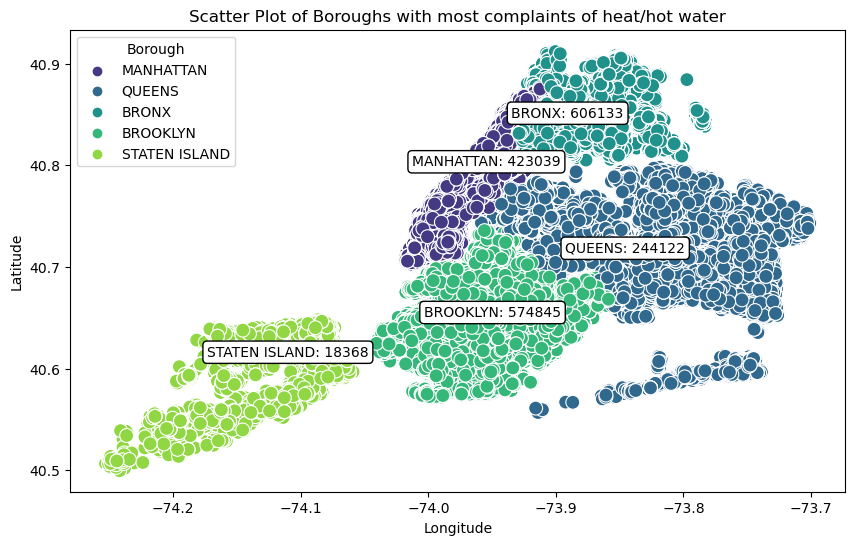

In [22]:
borough_counts = df2['Borough'].value_counts()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Borough', data=df2, s=100, palette='viridis')


for borough, count in borough_counts.items():
    plt.annotate(f'{borough}: {count}', 
                 df2[df2['Borough'] == borough][['Longitude', 'Latitude']].mean(),
                 ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.title('Scatter Plot of Boroughs with most complaints of heat/hot water')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


# Here a visualization to make it clear.


In [23]:
df2.head()

,Borough,Incident Zip,Street Name,Latitude,Longitude,Complaint Type
0,MANHATTAN,10019.0,WEST 52 STREET,40.765132,-73.988993,HEAT/HOT WATER
2,QUEENS,11372.0,37 AVENUE,40.750269,-73.879432,HEAT/HOT WATER
3,BRONX,10458.0,SOUTHERN BOULEVARD,40.853773,-73.881558,HEAT/HOT WATER
5,BRONX,10456.0,MORRIS AVENUE,40.831381,-73.915218,HEAT/HOT WATER
7,QUEENS,11372.0,81 STREET,40.749320,-73.885190,HEAT/HOT WATER


In [24]:
df2["Incident Zip"].value_counts().head(5)

Incident Zip
11226.0    59673
10467.0    57190
10458.0    56992
10468.0    50670
10453.0    49938
Name: count, dtype: int64

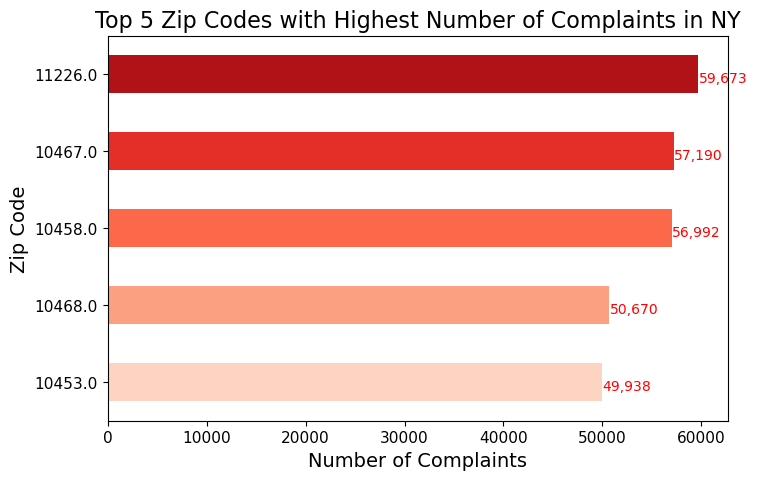

In [25]:
zipcodes = df2['Incident Zip'].value_counts().head(5).sort_values()
zipcodes.index =zipcodes.index.map(str)
color = sns.color_palette('Reds', len(zipcodes))

zipcodes.plot(kind='barh', figsize=(8, 5), fontsize=11, color=color)
plt.title('Top 5 Zip Codes with Highest Number of Complaints in NY', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Zip Code', fontsize=14)

for index, value in enumerate(zipcodes):
    label = str(format(int(value), ','))
    plt.annotate(label, xy=(value + 50, index - 0.1), color='red', fontsize=10)

plt.show()

# 11226 is the zip code with the best complaint

# Now let's see 11226 the zip code of what borough

In [26]:
df2[df2['Incident Zip'] == 11226.0].iloc[0]['Borough']

'BROOKLYN'

# Brooklyn is the second borough NYC should take care of.

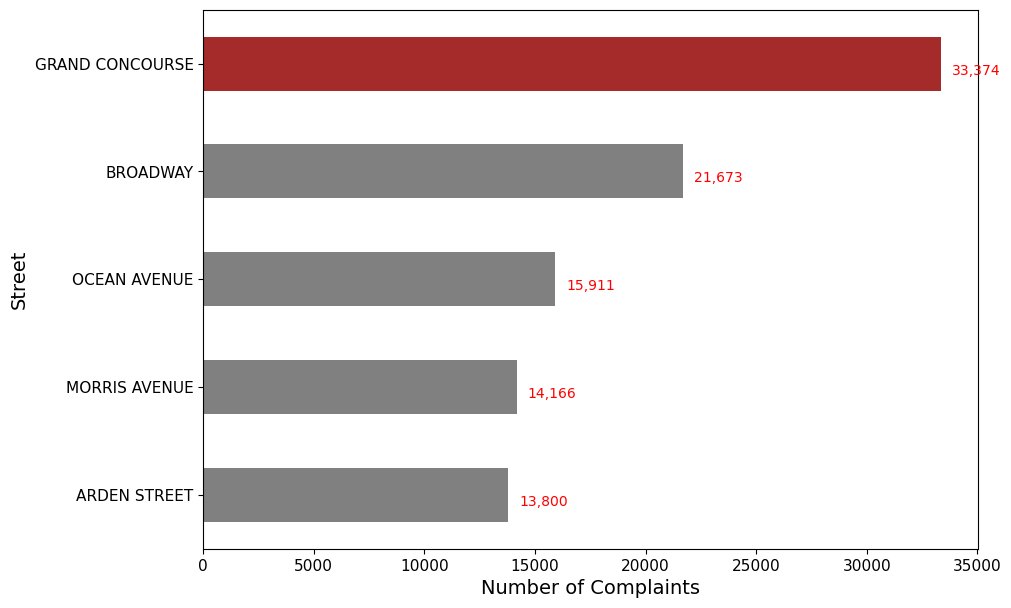

In [27]:
colors = ['Grey', 'Grey', 'Grey', 'Grey', 'Brown']
streets = df2['Street Name'].value_counts().head().sort_values()

streets.plot(kind = 'barh', figsize = (10, 7), fontsize = 11, color = colors)
plt.ylabel('Street', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

for index, value in enumerate(streets):   
    label = str(format(int(value), ',')) 
    plt.annotate(label, xy = (value + 500, index - 0.1), color = 'red')

# Grand Concourse is the street with the biggest complaints

# Now let's see the street in what borough

In [28]:
df[df['Street Name'] == 'GRAND CONCOURSE'].iloc[0]['Borough']

'BRONX'

# The Department of Housing Preservation and Development of New York City focus on :
##  Boroughs : Bronx
## ZIP codes :Brooklyn
## Sreets: Grand Concourse which is in Bronx 

In [29]:
df.nunique()

Unnamed: 0                6019843
Unique Key                6019843
Created Date              1675132
Closed Date                757706
Complaint Type                 28
Location Type                   5
Incident Zip                  202
Incident Address           182600
Street Name                  6825
Address Type                    1
City                           89
Status                          5
Resolution Description        340
Borough                         6
Latitude                   180072
Longitude                  180072
dtype: int64

In [33]:
df3 = df[(df['Complaint Type'] == 'HEAT/HOT WATER')]

In [34]:
df3

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,2020-02-02 06:09:17,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
2,2,45527528,2020-02-02 02:27:41,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,2020-02-02 12:13:18,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
5,5,45530344,2020-02-02 07:52:08,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218
7,7,45527939,2020-02-02 09:00:54,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.749320,-73.885190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019836,6019836,44063680,2019-10-15 18:43:56,10/16/2019 05:55:02 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029.0,327 EAST 108 STREET,EAST 108 STREET,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.791359,-73.940184
6019838,6019838,44063685,2019-10-15 10:35:45,10/16/2019 05:55:02 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029.0,327 EAST 108 STREET,EAST 108 STREET,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.791359,-73.940184
6019839,6019839,44063692,2019-10-15 06:09:28,10/15/2019 04:12:58 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,3555 BRUCKNER BOULEVARD,BRUCKNER BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.847809,-73.827481
6019840,6019840,44063724,2019-10-15 10:54:45,10/16/2019 06:14:29 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.864764,-73.922764


In [72]:
df3_copy=df3.copy()

In [35]:
df_copy=df.copy()

In [82]:
label_encoder = LabelEncoder()
df3_copy['Complaint Type'] = label_encoder.fit_transform(df3_copy['Complaint Type'])
for label, category in enumerate(label_encoder.classes_):
    print(f"Label {label}: {category}")

Label 0: HEAT/HOT WATER


In [81]:
label_encoder = LabelEncoder()
df3_copy['Location Type'] = label_encoder.fit_transform(df3_copy['Location Type'])
for label, category in enumerate(label_encoder.classes_):
    print(f"Label {label}: {category}")

Label 0: RESIDENTIAL BUILDING


In [44]:
df_copy.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unnamed: 0              int64         
 1   Unique Key              int64         
 2   Created Date            datetime64[ns]
 3   Closed Date             object        
 4   Complaint Type          int32         
 5   Location Type           int32         
 6   Incident Zip            float64       
 7   Incident Address        object        
 8   Street Name             object        
 9   Address Type            object        
 10  City                    object        
 11  Status                  object        
 12  Resolution Description  object        
 13  Borough                 object        
 14  Latitude                float64       
 15  Longitude               float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(8)
memory usage: 688.9+ 

In [80]:
label_encoder = LabelEncoder()
df3_copy['Incident Address'] = label_encoder.fit_transform(df3_copy['Incident Address'])

In [79]:
label_encoder = LabelEncoder()
df3_copy['Address Type'] = label_encoder.fit_transform(df3_copy['Address Type'])

In [78]:
label_encoder = LabelEncoder()
df3_copy['Borough'] = label_encoder.fit_transform(df3_copy['Borough'])

In [77]:
label_encoder = LabelEncoder()
df3_copy['City'] = label_encoder.fit_transform(df3_copy['City'])

In [76]:
label_encoder = LabelEncoder()
df3_copy['Incident Zip'] = label_encoder.fit_transform(df3_copy['Incident Zip'])

In [75]:
label_encoder = LabelEncoder()
df3_copy['Resolution Description'] = label_encoder.fit_transform(df3_copy['Resolution Description'])

In [74]:
label_encoder = LabelEncoder()
df3_copy['Status'] = label_encoder.fit_transform(df3_copy['Status'])

In [73]:
label_encoder = LabelEncoder()
df3_copy['Street Name'] = label_encoder.fit_transform(df3_copy['Street Name'])

In [84]:
df_copy[['Complaint Type', 'Location Type','Borough','Address Type','Incident Address','City','Incident Zip','Status','Resolution Description','Street Name']].corr()

,Complaint Type,Location Type,Borough,Address Type,Incident Address,City,Incident Zip,Status,Resolution Description,Street Name
Complaint Type,1.000000,0.050809,-0.043312,NaN,-0.006098,-0.013107,0.004074,-0.002266,0.054455,-0.004330
Location Type,0.050809,1.000000,-0.010260,NaN,-0.000703,-0.000377,-0.000609,0.000287,0.001723,-0.001397
Borough,-0.043312,-0.010260,1.000000,NaN,0.066462,0.441421,0.115406,0.019717,-0.108752,-0.055796
Address Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident Address,-0.006098,-0.000703,0.066462,NaN,1.000000,0.091751,0.031984,0.002043,0.013756,-0.003073
City,-0.013107,-0.000377,0.441421,NaN,0.091751,1.000000,-0.216771,0.006987,0.017546,0.021924
Incident Zip,0.004074,-0.000609,0.115406,NaN,0.031984,-0.216771,1.000000,-0.000533,0.043628,-0.218396
Status,-0.002266,0.000287,0.019717,NaN,0.002043,0.006987,-0.000533,1.000000,0.119342,0.003166
Resolution Description,0.054455,0.001723,-0.108752,NaN,0.013756,0.017546,0.043628,0.119342,1.000000,0.011397
Street Name,-0.004330,-0.001397,-0.055796,NaN,-0.003073,0.021924,-0.218396,0.003166,0.011397,1.000000


________________________________________________________________________________________________________________________________

In [83]:
df3_copy[['Complaint Type', 'Location Type','Borough','Address Type','Incident Address','City','Incident Zip','Status','Resolution Description','Street Name']].corr()

,Complaint Type,Location Type,Borough,Address Type,Incident Address,City,Incident Zip,Status,Resolution Description,Street Name
Complaint Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Borough,NaN,NaN,1.000000,NaN,NaN,0.404233,0.088586,0.045565,-0.232164,-0.095706
Address Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,NaN,0.404233,NaN,NaN,1.000000,-0.244324,0.022578,-0.011844,-0.025402
Incident Zip,NaN,NaN,0.088586,NaN,NaN,-0.244324,1.000000,0.005688,0.022821,-0.249987
Status,NaN,NaN,0.045565,NaN,NaN,0.022578,0.005688,1.000000,0.049605,-0.006120
Resolution Description,NaN,NaN,-0.232164,NaN,NaN,-0.011844,0.022821,0.049605,1.000000,-0.015251
Street Name,NaN,NaN,-0.095706,NaN,NaN,-0.025402,-0.249987,-0.006120,-0.015251,1.000000


# Heat/ Hot Water does not have any relation or correaltion with any particular characteristics or buildings

In [88]:
cross_tab = pd.crosstab(df_copy['Complaint Type'], df_copy['City'])


chi2, _, _, _ = chi2_contingency(cross_tab)


num_rows, num_cols = cross_tab.shape
cramers_v = (chi2 / (num_rows * min(num_cols - 1, 1)))**0.5

print(f"Cramér's V: {cramers_v}")


Cramér's V: 387.2372030058447


# Not Logic


In [51]:
df_copy[['Complaint Type', 'Location Type','Borough']].corr()

,Complaint Type,Location Type,Borough
Complaint Type,1.000000,0.050809,-0.043312
Location Type,0.050809,1.000000,-0.010260
Borough,-0.043312,-0.010260,1.000000


In [102]:
X = df_copy[['Month', 'Borough']]  
y = df_copy['Complaint Type']  == 'HEAT/HOT WATER'


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1203969

    accuracy                           1.00   1203969
   macro avg       1.00      1.00      1.00   1203969
weighted avg       1.00      1.00      1.00   1203969




# not logical decesion tree
# So machine learning model won't be able to predict